In [ ]:
# hybrid 2 complete procedure
# July 29

#Users/ alind/ Documents/ Download_CodeForCSVwithHeader

# initial clusters count

# aug 7

# sept 3

In [3]:
# reset x, y min and max
xmin = -200
xmax = 200
ymin = -200
ymax = 200

In [1]:
xmin

NameError: name 'xmin' is not defined

In [ ]:
# scoring functions 
import numpy as np
# log: ln r 

# take ln of probability 
def ln_score(r):
    return(np.log(r)) 



# quadratic / Brier
# 2r_i - sum r_j^2 
def quad_score(ri, r): # r_i probability assigned to correct answer , C is # classes
    qs = 2*ri - np.sum(r)
    return(qs)
    
# spherical scoring rule
def sphere_score(ri, r): # r is the array of all values
    sqsum =0
    for el in r:
        sqsum=sqsum+np.pow(el, 2)
    den = np.sqrt(sqsum)
    return( float(ri/den))
    

In [ ]:
# plot the different cells and frequencies obtained 


# method: save the cells within 80% of frequency of each other


# in the next cluster, divide the score by the magnitude of the points that make up cluster?

In [ ]:
# score for linear sum assignment

# inversely proportional

def neg_ln_score(r):
    return(- np.log(r))


In [2]:
dcmap1

NameError: name 'dcmap1' is not defined

In [4]:

# december step 1

dcmap1 = {}
ind= 0

for ix in range(int(xmin), int(xmax)):
    for iy in range(int(ymin), int(ymax)):
        myvec=[]
        myvec.append(ix)
        myvec.append(iy)
        dcmap1[ind]=myvec
        ind=ind+1


# december step 2 
dlookupdict={}
dinvlookupdict={}

for i in range(160000):
    dlookupdict[i] = dcmap1[i]
    p1 = dcmap1[i][0]
    p2 = dcmap1[i][1]
    dinvlookupdict[(p1,p2)]=i


In [3]:
# DO NOT NEED THIS STEP 

# initialize 

# combine steps 

# december step 2 
dlookupdict={}
dinvlookupdict={}

for i in range(160000):
    dlookupdict[i] = dcmap1[i]
    p1 = dcmap1[i][0]
    p2 = dcmap1[i][1]
    dinvlookupdict[(p1,p2)]=i

# december step 3

dtrajcount={}
# xmin, xmax, ymin, ymax

# change range to -10, 10
range1 = 10 

for i in range(160000):
    p = dlookupdict[i]
    px = p[0]
    py = p[1]
    if i==100000:
        print(100000)
    # calculate x between i.x - 5, i.x+5
    for j in range(-range1, range1+ 1):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        # calculate y between i.y-5, i.y+5 
        for k in range(-range1, range1+1):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            # inv dict lookup
            p2 = dinvlookupdict[(jx, jy)]
            # save trajcount1[(i, p2)]
            dtrajcount[(i, p2)]=0


MemoryError: 

In [8]:
#del dtrajcount
%reset -f

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import csv

In [5]:
# 7/6 trajcount1

# train trajcount1
trajcount1={}

fileind = 1
import os
for filename in os.listdir('24hrdata'):
    goforward=0
    #entries = os.listdir()
    print(filename)
    fileind = fileind+1
    #if fileind > 3:
    #    break
    fname = '24hrdata/'+filename
    irow=0
    obnum=1
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            irow=irow+1
            trajnum = row[0]
            frameindex = row[17]
            #print("frame:",frameindex)
            if line_count==0:
                line_count=line_count+1
                continue
            if line_count==1:
                line_count=line_count+1
                prevrow = row
                prevx = float(prevrow[6])
                prevy = float(prevrow[7])
                print(prevx)
                print(prevy)
                # use round instead of floor
                pfx1 = round(prevx) # use pfx1, pfx2 
                pfy1 = round(prevy)
                continue
            currentx = float(row[6])
            currenty = float(row[7])
            fx = round(currentx)
            fy = round(currenty)
            
            
            if obnum != trajnum:
                pfx1 = fx
                pfy1 = fy
                # reset pfx2 , pfy2 : go forward 1 row
                goforward=1
                obnum = trajnum
                prevframe = frameindex
                line_count = line_count+1
                continue
            # save to map
            fromi = dinvlookupdict[(pfx1,pfy1)]
            toi = dinvlookupdict[(fx,fy)]
            
            # check if it is in range : exclude outliers dictionary
            """if abs(pfx - fx)>10 or abs(pfy - fy)>10:
                line_count= line_count+1
                continue"""
            list1 = trajcount1.get(fromi) # list of maps
            if list1 ==None:
                #newlist2 = []
                #newmap2 = {}
                #newmap2[toi] = 1
                newmapfrom = {}
                newmapfrom[toi]= 1
                trajcount1[fromi]= newmapfrom
            else:
                getcount= list1.get(toi)
                #if getcount>5000:
                #    print("fromi:", fromi, " toi:", toi)
                if getcount==None:
                    list1[toi] = 1
                    trajcount1[fromi] = list1
                else:
                    count = list1[toi]
                    newcount = count+1
                    list1[toi] = newcount
                    trajcount1[fromi] = list1
                
            
            #mcount = trajcount2[(fromi, toi)]
           
            #dtrajcount[(fromi, toi)]= mcount+1
            pfx1 = fx
            pfy1 = fy 
            prevframe= frameindex
            line_count = line_count+1
            

2019-8-27-0-0-0-BF1-CL1-Traj(0-18000frames).csv
-6.16064
7.21828
2019-8-27-0-30-0-BF1-CL1-Traj(0-18000frames).csv
94.8488
24.8301
2019-8-27-1-0-0-BF1-CL1-Traj(0-18000frames).csv
-79.207
15.7409
2019-8-27-1-30-0-BF1-CL1-Traj(0-18000frames).csv
-68.1242
13.8972
2019-8-27-10-0-0-BF1-CL1-Traj(0-18000frames).csv
-36.0177
8.06411
2019-8-27-10-30-0-BF1-CL1-Traj(0-18000frames).csv
-20.8098
9.06996
2019-8-27-11-0-0-BF1-CL1-Traj(0-18000frames).csv
12.7673
8.01511
2019-8-27-11-30-0-BF1-CL1-Traj(0-18000frames).csv
33.3678
28.9857
2019-8-27-12-0-0-BF1-CL1-Traj(0-18000frames).csv
33.3341
28.2393
2019-8-27-12-30-0-BF1-CL1-Traj(0-18000frames).csv
-32.6858
12.0325
2019-8-27-13-0-0-BF1-CL1-Traj(0-18000frames).csv
-7.91949
12.3122
2019-8-27-13-30-0-BF1-CL1-Traj(0-18000frames).csv
-24.7955
8.72216
2019-8-27-14-0-0-BF1-CL1-Traj(0-18000frames).csv
-33.5303
15.3514
2019-8-27-14-30-0-BF1-CL1-Traj(0-18000frames).csv
-21.0828
8.26651
2019-8-27-15-0-0-BF1-CL1-Traj(0-18000frames).csv
17.1306
8.11225
2019-8-27-15-

In [ ]:
# code to find the initial general direction

# from the training

# divide the space into cells: tree?


In [1]:
dtrajcount[(1,1)]

NameError: name 'dtrajcount' is not defined

In [6]:
# load errorclusters
#THIS ONE 
# error clusters 


# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
lidarsim = 'file_out/lidar_similarlabeledclusters_v2.csv'


#lidarsim='lidar_similar301-600.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            

In [6]:
# errorclusters

In [7]:

def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [6]:
# rename

#datastorename = 'datastoreAug16.csv'


def findnextclusterapp(iframe, initialcluster): # frame and cluster
    #datastorename='datastoreAug16.csv'
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    rowid = 0
    #datastorename = 'datastoreAug16.csv'
    if iframe > 300:
        datastorename='datastoreAug16.csv'
    if iframe>550:
        datastorename='datastoreAug25.csv'
    
    
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            rowid = rowid+1
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue
                
            if framenum > iframe:
                break

            if clusterid == initialcluster:
                #print("row", rowid)
                #print("frame num", framenum)
                #print("init cluster", initialcluster)
                #print("matched is ", matched)
                outputmatched = matched
                return outputmatched
            
    return outputmatched

# find the next cluster from our algorithm

# iterate over all the clusters in frame len1+1 to see 
# iframe is frame number 

def findnextcluster(iframe, elementclusterarray):  # iframe is the current cluster, clusterarray holds ids of similar clusters 

    ky =0 # if no next cluster
    # sort by increasing order
    #sortedarray = np.sort(clusterarray)
    
    name = "file_out/file_out"
    name = name+str(iframe)
    name1 = name+".csv"
    name2 = "file_out/file_out"+str(iframe+1)+".csv"

# clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    with open(name1) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        countmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            cid= float(row[0]) 
            # determine which cluster id is the highest 
            xr = round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            #h1, i1 = dhighestfreq(fromi)
            list1 = trajcount1.get(fromi) # list of maps
            if list1 !=None:
                i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                #currentmap[i1] = 1

            if cid ==  elementclusterarray:
                countmap[i1] = 1

    obnum = 1 

    f = 0                   
    with open(name2) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            cid = float(row[0])
            xr =round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # next cluster 
            if cid != obnum:
                numo1 = float(obnum)
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    ky = numo1
                obnum = cid

            val = countmap.get(fromi)
            if val != None:
                matchfreq[cid] =matchfreq[cid]+1


    #print(ky, "is the next cluster")     
    return ky

In [7]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [25]:
highestfreq1(79412)

80212

In [9]:
# initialize 
#sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
map10 = {}

sfs = [10, 20, 30, 40, 50, 60,70, 80,90,100]
for s in sfs:
    map10[s] = []
    

In [32]:
#sfs = [110, 120, 130, 140,150, 160,170,180,190,200]
#map10 = {}
sfs = [310, 320, 330, 340,350,360,370,380,390,400,410,420,430,440,450]
sfs = [410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

for s in sfs:
    map10[s] = []

In [17]:
map10

{10: [],
 20: [],
 30: [],
 40: [],
 50: [],
 60: [],
 70: [],
 80: [],
 90: [],
 100: []}

In [8]:
# version where finding max trajectories

# original frequency grid method

c1 = 1
c2 = 12 # 6

ca = list(range(c1, c2+1))




# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 380
endframe = 480

# unew = map10[initialframe]

unew = []
carray = np.setdiff1d(ca, unew)


for initialcluster in carray:#range(c1, c2+1):
    
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}

    prevmap = {}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf


    thres= 10

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []


    for i in range(initialframe, endframe+1):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0

        currentmap3 = {} # average coordinates

        #print("curr frame is:", i)


        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                h1, i1 = dhighestfreq(fromi)
                # save to map
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val == None:
                    pass
                else:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1
            numo2 = float(clusterid)
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            xvalues=[] ##RESET
            yvalues=[]
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap

            if len(hxvalues) ==0:
                break 
                
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                finalx.append(avx)
                finaly.append(avy)

            #print("final x", finalx)
            #print("final y", finaly)
            
            # add final key to map10
            if i % 10==0:
                print("(map10) i is", i)
                print("(map10) key is", ky)
                m10 = map10[i]
                m10.append(ky)
                # check sim clusts
                v1 = errorclusters.get(i)
                if v1!=None:
                    errorarray= errorclusters[i]
                    for el in errorarray:
                        for e in el:
                            if e == ky:
                                m10.extend(el)
                map10[i] = m10

    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    listclusterids= finalarray
    
    print("listclusterids is", listclusterids)
    
    # plot
    
    
    alen = len(finalarray)
    print("length of array ", alen)
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            plt.scatter(xarray,yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.show()

NameError: name 'dhighestfreq' is not defined

In [13]:
import math
# make map for every 10 
map10 = {}

# initialize 
sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

for s in sfs:
    map10[s] = []

In [ ]:
# occlusion finding 

# find angle from the sensor 

# iterate over all clusters in the current frame

# abrupt ending of cluster indicator from prev frame 
abend = 0 
# which clusters have abrupt ending
abend_list = []

for i in range(initialframe, endframe+1):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    currentmap3 = {} # average coordinates

    print("curr frame is:", i)

    
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        obnum=1 

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    #i1 = newhighestfreq(fromi)
                    prevmap[i1] = 1

            plt.scatter(arrayx, arrayy)
            
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            
            finalx.append(avx)
            finaly.append(avy)
            
            # save angle
            
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
            
            #append avx and avy
            avex.append(avx)
            avey.append(avy)

            # reset ky 
            ky = initialcluster
            continue
        for row in csv_reader:
            clusterid = float(row[0])

            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1

                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum= clusterid
                currentmap={}
                # take the average
                avecurrentx = np.mean(xvalues)
                avecurrenty = np.mean(yvalues)
                currentmap3[numo1] = [avecurrentx, avecurrenty]

                xvalues =[]
                yvalues =[]

                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val == None:
                pass
            else:
                numo = float(obnum)
                matchfreq[numo] = matchfreq[numo]+1
        numo2 = float(clusterid)
        avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
        avecurrenty = np.mean(yvalues)
        currentmap3[numo2] = [avecurrentx, avecurrenty]
        totalmap[numo2] = currentmap
        xvalues=[] ##RESET
        yvalues=[]
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        
        if len(hxvalues) ==0:
            # add to abrupt ending list 
            
            break
            
        if len(hxvalues) !=0:
            finalarray.append(ky)
            prevmap = totalmap[ky]
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            
            
            finalx.append(avx)
            finaly.append(avy)

curr frame is: 120
curr frame is: 121
f is 13
curr frame is: 122
f is 219
curr frame is: 123
f is 221
curr frame is: 124
f is 538
curr frame is: 125
f is 460
curr frame is: 126
f is 197
curr frame is: 127
f is 173
curr frame is: 128
f is 157
curr frame is: 129
f is 154
curr frame is: 130
f is 163
curr frame is: 131
f is 116
curr frame is: 132
f is 135
curr frame is: 133
f is 98
curr frame is: 134
f is 92
curr frame is: 135


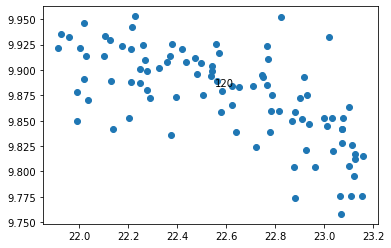

In [51]:
# original method single cluster


arrayx = []
arrayy = []
pavex = []
pavey = []

phx = [] # previous high x values
phy =[] 

initialframe = 120
endframe= 150

initialcluster=3

obnum = 1

totalmap ={}

prevmap = {}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf


thres= 10

finalarray=[]

finalarray.append(initialcluster)

finalx =[]
finaly =[]

avex =[]
avey =[]

xvalues =[]
yvalues =[]

for i in range(initialframe, endframe+1):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    currentmap3 = {} # average coordinates

    print("curr frame is:", i)

    
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        obnum=1 

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    #i1 = newhighestfreq(fromi)
                    prevmap[i1] = 1

            plt.scatter(arrayx, arrayy)
            
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            
            finalx.append(avx)
            finaly.append(avy)
            
            # save angle
            
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
            
            #append avx and avy
            avex.append(avx)
            avey.append(avy)

            # reset ky 
            ky = initialcluster
            continue
        for row in csv_reader:
            clusterid = float(row[0])

            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1

                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum= clusterid
                currentmap={}
                # take the average
                avecurrentx = np.mean(xvalues)
                avecurrenty = np.mean(yvalues)
                currentmap3[numo1] = [avecurrentx, avecurrenty]

                xvalues =[]
                yvalues =[]

                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val == None:
                pass
            else:
                numo = float(obnum)
                matchfreq[numo] = matchfreq[numo]+1
        numo2 = float(clusterid)
        avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
        avecurrenty = np.mean(yvalues)
        currentmap3[numo2] = [avecurrentx, avecurrenty]
        totalmap[numo2] = currentmap
        xvalues=[] ##RESET
        yvalues=[]
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        
        if len(hxvalues) ==0:
            break
            
        if len(hxvalues) !=0:
            finalarray.append(ky)
            prevmap = totalmap[ky]
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            
            
            finalx.append(avx)
            finaly.append(avy)

[3]

c:\users\alind\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\alind\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


i is 600
av coord are nan nan


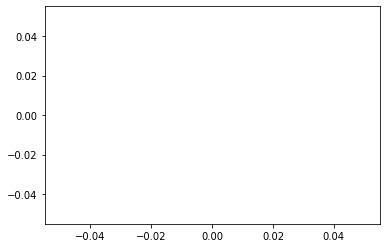

In [21]:
initialframe=600
# plot other clusters
array1 = finalarray[0:5]

alen = len(array1)
xv1=[]
yv1=[]

ax =[]
ay =[]

acounter=0
for i in range(initialframe, initialframe+1):
    name = "file_out/file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = array1[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                #xmissed.append(xpoint)
                #ymissed.append(ypoint)
                
                
        # plot
        #xv1.extend(xarray)
        #yv1.extend(yarray)
        
        
        plt.scatter(xarray,yarray)
        avx = np.mean(xarray)
        avy = np.mean(yarray)
        
        print("i is", i)
        print("av coord are", avx, avy)
        
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
        ax.append(avx)
        ay.append(avy)
    
    acounter =acounter +1
    if acounter > alen:
        break

#plt.scatter(xv1, yv1)
#plt.scatter(xv2, yv2)
plt.show()


f is 13
f is 219
f is 221
f is 538
f is 460
f is 197
f is 173
f is 157
f is 154
f is 163
f is 116
f is 135
f is 98
f is 92
f is 29
f is 19
f is 14
f is 29


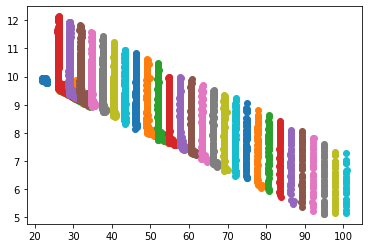

In [57]:



arrayx = []
arrayy = []
pavex = []
pavey = []

phx = [] # previous high x values
phy =[] 

initialframe = 120
endframe= 150

initialcluster=3

obnum = 1

totalmap ={}

prevmap = {}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf


thres= 10

finalarray=[]

finalarray.append(initialcluster)

finalx =[]
finaly =[]

avex =[]
avey =[]

xvalues =[]
yvalues =[]

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]
        
        currentmap= {}
        
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    prevmap[i1] = 1
            plt.scatter(arrayx, arrayy)
            # reset ky 
            ky = initialcluster
            continue
            
        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1
                    
                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid
                
                currentindices=[]
                currentmap= {}
                
                xvalues =[]
                yvalues =[]
                # append first values
                #xvalues.append(float(row[1]))
                #yvalues.append(float(row[2]))
                
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val ==None:
                pass
            else:
                numo = float(obnum)
                matchfreq[numo]= matchfreq[numo]+1
        # check f values at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        finalarray.append(ky)
        # ky is the cluster id with the highest frequency
        listclusterids.append(ky)
        plt.scatter(hxvalues, hyvalues)
        
        if len(hxvalues) ==0:
            print("0 h vals")
        if len(hxvalues) !=0:
            # set prevmap to the one 
            
            prevmap = totalmap[ky]
        # obnum
        
plt.show()

In [59]:
# test the freq grid

import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


# december highest 
# step 4 b 


class frequency_grid(object):
    
    def __init__(self, numpoints=3):
        self.numpoints = numpoints
        self.time_elapsed= 0 # 0
        self.numcells = 160000
        
        self.xmin =-200
        self.xmax = 200
        self.ymin =-200
        self.ymax =200
        
        self.forwardmap = {}  # dcmap1
        self.backmap = {}
        self.countmap = {}
        
        self.current_position = []
        self.prevmap = {} # set to current map at end of frame 
        self.currentmap = {}
        
        self.tracking_list = {} # list of objects that are tracked 
        
        # step 1
        ind_temp = 0
        for ix in range(int(self.xmin), int(self.xmax)):
            for iy in range(int(self.ymin), int(self.ymax)):
                myvec = []
                myvec.append(ix)
                myvec.append(iy)
                self.forwardmap[ind_temp] = myvec
                self.backmap[(ix, iy)]= ind_temp
                ind_temp=ind_temp+1
        
        self.range = 10
        # initialize grid count map
        for i in range(self.numcells):
            p = self.forwardmap[i]
            px = p[0]
            py = p[1]
            for j in range(-self.range, self.range+1):
                jx = px+j
                if jx > self.xmax-1 or jx < self.xmin:
                    continue
                for k in range(-self.range, self.range+1):
                    jy = py +k
                    if jy > self.ymax-1 or jy<self.ymin:
                        continue
                    p2 = self.backmap[(jx, jy)]
                    self.countmap[(i, p2)] = 0 # dtrajcount
    
        
    # set up based on trajectories file : training method 
    def setup_grid(): 
        
        fileind = 1
        for filename in os.listdir('24hrdata'):
            fname = '24hrdata/'+filename
            fileind =fileind+1
            #irow=0
            obnum=1
            with open(fname) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                for row in csv_reader:
                    trajectory_num = row[0]
                    if line_count==0:
                        line_count = line_count+1 # skip header
                    if line_count==1:
                        prevrow = row
                        prevx = float(prevrow[6])
                        prevy = float(prevrow[7])
                        pfx = round(prevx)
                        pfy = round(prevy)
                        continue
                    currentx = float(row[6])
                    currenty = float(row[7])
                    fx = round(currentx)
                    fy = round(currenty)
                    if pfx == fx and pfy ==fy:
                        #prevframe = frameindex
                        continue
                    if obnum != trajectory_num:
                        pfx = fx
                        pfy = fy
                        obnum = trajectory_num
                        continue
                    #save
                    fromi = self.backmap[(pfx, pfy)]
                    toi = self.backmap[(fx, fy)]
                    if abs(pfx - fx)>10 or abs(pfy - fy)>10:
                        continue
                    mcount = self.countmap[(fromi, toi)]
                    self.countmap[(fromi, toi)] = mcount+1
                    pfx=fx
                    pfy=fy
    
    def highestfreq(fromi):
        highest = 0
        indexhighest = fromi
        (px, py) = self.forwardmap[fromi]
        for j in range(-10, 11):
            jx = px+j
            if jx>xmax-1 or jx<xmin: # check if pts in range
                continue
            for k in range(-10, 11):
                jy = py+k
                # check if pts are in range
                if jy>ymax-1 or jy<ymin:
                    continue
                toi = self.backmap[(jx, jy)]
                t = self.countmap[(fromi, toi)]
                #if t>0:
                    #print(t)
                if t > highest:
                    highest=t
                    indexhighest=toi
        return highest, indexhighest

In [ ]:
fg = frequency_grid()

frame by 10 is 560  with cluster  8
frame by 10 is 570  with cluster  2
frame by 10 is 580  with cluster  1


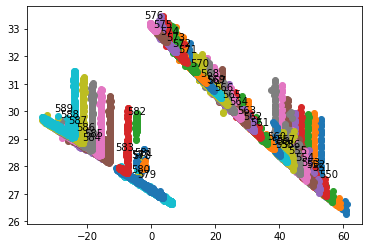

In [104]:
# distance
initialframe = 550
endframe= 590

initialcluster = 5

import matplotlib.pyplot as plt


# array to be plotted
arrayx = []

arrayy = []

xvalues = []
yvalues = []

finalarray=[]

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)
# initialize distances map 
mapdistances = defaultdict(list)

obnum =0

currentdistances = []

mx=15

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []
    


for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear map
    for j in range(0, mx):
        mapdistances[j] =[]
        totxvalues[j] =[]
        totyvalues[j]=[]
        
    with open(name) as csv_file:
        m = 1000
        
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            #print("i",i)
            for row in csv_reader:
                
                clusterid = float(row[0])
                
                #print("clusterid", clusterid)
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    
            # find average 
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            avprev = [avx, avy ]
            #plt.plot(arrayx, arrayy)
            plt.scatter(arrayx, arrayy)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
            continue
            
        for row in csv_reader:
            clusterid = float(row[0]) # current cluster id 
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                # new comparisons 
                obnum = clusterid
                
                currentdistances=[]
                #currentmap= {}
                
                xvalues =[]
                yvalues =[]
                
                continue
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            # calc distance
            dx1 = avx - xpoint
            dy1 = avy - ypoint
            d1 = pow(dx1, 2) + pow(dy1, 2)
            dist = pow(d1, 0.5)
            currentdistances.append(dist) 
            
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances < m:
                m = meandistances
                ky = j 
        finalarray.append(ky)
        hxvalues = totxvalues[ky]
        hyvalues = totyvalues[ky]
        
        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        
        #plt.plot(hxvalues, hyvalues)
        plt.scatter(hxvalues, hyvalues)
        
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
        # print 10th cluster
        if i % 10 ==0:
            print("frame by 10 is",i, " with cluster ", ky)
        # print mean
        #print("mean x,",np.mean(hxvalues))
        #print("mean y,",np.mean(hyvalues))
        
        # reset hxvalues and hyvalues (don't need )
        hxvalues =[]
        hyvalues =[]
        
plt.show()

In [105]:
577- 550

27

In [98]:
# code to find out the num of clusters in the current frame

i = 550# start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]

print(clusteridfinal)

10


In [3]:
import math
# make map for every 10 
map10 = {}

# initialize 
sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
#sfs = [10, 20 , 30, 40, 50, 60, 70, 80, 90, 100 ]
#sfs = [300, 310, 320 , 330, 340, 350, 360, 370, 380, 390, 400]
for s in sfs:
    map10[s] = []

In [19]:
map10

{10: [],
 20: [],
 30: [],
 40: [],
 50: [],
 60: [],
 70: [],
 80: [],
 90: [],
 100: []}

In [27]:
#map10[20]= [3]
#map10[30]= [3]
#map10[40] = [8]
map10[50] = [6]
map10[60] = [1]
map10[70] = [1]
map10[80] = [4]
map10[90] = [5]
map10[100] = [7]

map10[500] = [2]
map10[510] = [6]

In [49]:
a = np.array(range(1,11))
for el in a:
    print(el)

1
2
3
4
5
6
7
8
9
10


initial cluster is, 1
frame by 10 is 560  with cluster  2


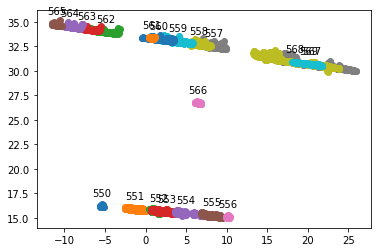

initial cluster is, 2
frame by 10 is 560  with cluster  2


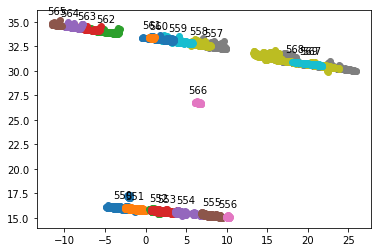

initial cluster is, 3
frame by 10 is 560  with cluster  2


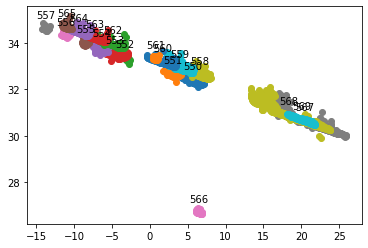

initial cluster is, 4
frame by 10 is 560  with cluster  2


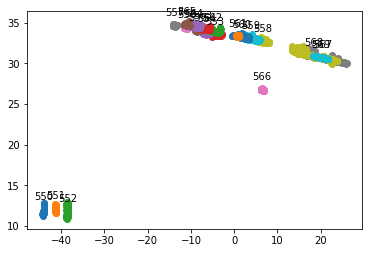

initial cluster is, 5
frame by 10 is 560  with cluster  8


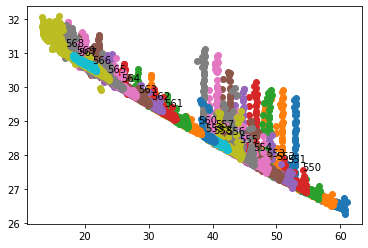

initial cluster is, 6
frame by 10 is 560  with cluster  8


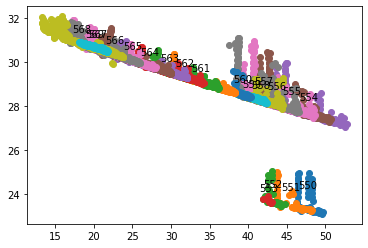

initial cluster is, 7
frame by 10 is 560  with cluster  10


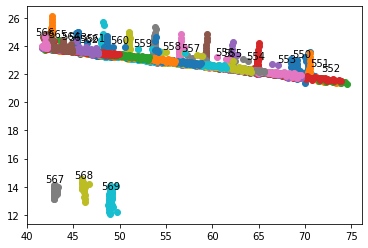

initial cluster is, 8
frame by 10 is 560  with cluster  10


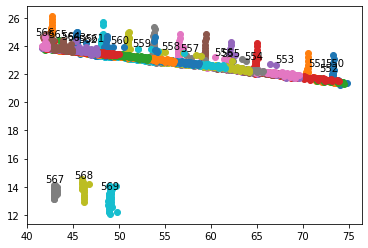

initial cluster is, 9
frame by 10 is 560  with cluster  8


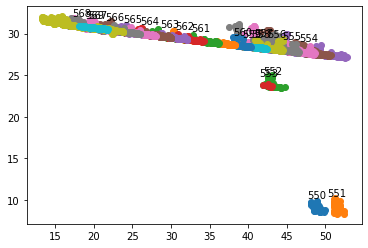

initial cluster is, 10
frame by 10 is 560  with cluster  2


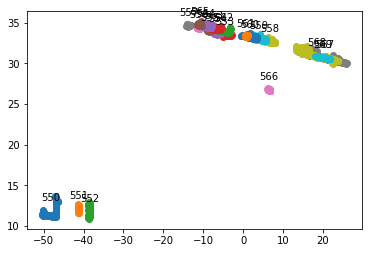

In [101]:
# looped distance version

import matplotlib.pyplot as plt

# distance
initialframe = 550
endframe= 570

imax = 10 # 2, 10
ic = np.array(range(1, imax+1))

unew = []
carray = np.setdiff1d(ic, unew)

for initialcluster in carray:

    print("initial cluster is,", initialcluster)

    # array to be plotted
    arrayx = []

    arrayy = []

    xvalues = []
    yvalues = []

    finalarray=[]

    totxvalues = defaultdict(list)
    totyvalues = defaultdict(list)
    # initialize distances map 
    mapdistances = defaultdict(list)

    obnum =0

    currentdistances = []

    mx=15

    for j in range(0, mx):
        mapdistances[j]=[]
        totxvalues[j] = []
        totyvalues[j] = []



    for i in range(initialframe, endframe):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear map
        for j in range(0, mx):
            mapdistances[j] =[]
            totxvalues[j] =[]
            totyvalues[j]=[]

        with open(name) as csv_file:
            m = 1000

            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                #print("i",i)
                for row in csv_reader:

                    clusterid = float(row[0])

                    #print("clusterid", clusterid)
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)

                # find average 
                avx = np.mean(arrayx)
                avy = np.mean(arrayy)
                avprev = [avx, avy ]
                #plt.plot(arrayx, arrayy)
                plt.scatter(arrayx, arrayy)
                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                continue

            for row in csv_reader:
                clusterid = float(row[0]) # current cluster id 

                if clusterid != obnum:
                    numo1 = float(obnum)
                    mapdistances[numo1] = currentdistances
                    totxvalues[numo1] = xvalues
                    totyvalues[numo1] = yvalues
                    # new comparisons 
                    obnum = clusterid

                    currentdistances=[]
                    #currentmap= {}

                    xvalues =[]
                    yvalues =[]

                    continue
                xpoint = float(row[1])
                ypoint = float(row[2])
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                # calc distance
                dx1 = avx - xpoint
                dy1 = avy - ypoint
                d1 = pow(dx1, 2) + pow(dy1, 2)
                dist = pow(d1, 0.5)
                currentdistances.append(dist) 

            for j in range(0, mx):
                meandistances = np.mean(mapdistances[j])
                if meandistances < m:
                    m = meandistances
                    ky = j 
            finalarray.append(ky)
            hxvalues = totxvalues[ky]
            hyvalues = totyvalues[ky]

            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)

            #plt.plot(hxvalues, hyvalues)
            plt.scatter(hxvalues, hyvalues)

            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            # print 10th cluster
            if i % 10 ==0:
                print("frame by 10 is",i, " with cluster ", ky)
            # print mean
            #print("mean x,",np.mean(hxvalues))
            #print("mean y,",np.mean(hyvalues))

            # reset hxvalues and hyvalues (don't need )
            hxvalues =[]
            hyvalues =[]

    plt.show()

In [1]:
import csv
# initial clusters count
i = 490 # start frame 
name = "file_out/file_out"
name = name+str(i)
name = name+".csv"
        


firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]

print("frame ", i, " and num ", clusteridfinal)

frame  490  and num  8


In [9]:
import operator
import math

def highestfreq1(fromi):
    highest=0
    indexhighest=fromi
    list1 = trajcount1[fromi]
    indexhighest=max(list1.items(), key=operator.itemgetter(1))[0]
    return indexhighest


In [4]:
# aug 7
import time

start = time.time()

totalcomparisons = 0

c1 = 1
c2 = 10

initialframe = 440
endframe = initialframe+10

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 
clustering_error = 0 


imissed=[]
icont = []
iwrong= []

timertimes = []

for initialcluster in range(c1, c2+1):
    
    
    start2 = time.time()
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}

    prevmap = {}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf


    thres= 50

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []
    
    # debugging, 8/31/21
    fvalmap = {}
    
    for i in range(initialframe, endframe+1):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq?
        for j in range(0, mx):
            matchfreq[j] =0

        currentmap3 = {} # average coordinates

        print("curr frame is:", i)

        # reset f? matchfreq?
        
        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        #h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        list1 = trajcount1.get(fromi) # list of maps
                        if list1 !=None:
                            i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                            #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                            currentmap[i1] = 1
                            prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                # save angle

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    
                    fvalmap[i] = matchfreq
                    """
                    if initialcluster==5:
                        print("matchfreq for frame ", i, "is:", matchfreq)"""
                    
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                #h1, i1 = dhighestfreq(fromi)
                # save to map
                list1 = trajcount1.get(fromi) # list of maps
                if list1 !=None:
                    i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                    #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                    currentmap[i1] = 1
                #currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val == None:
                    pass
                else:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1
            numo2 = float(clusterid)
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            xvalues=[] ##RESET
            yvalues=[]
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap

            if len(hxvalues) ==0:
                foundmin=0
                mindist = thres
                c_first=0
                for c in currentmap3:
                    cvalue = currentmap3[c]
                    cx = cvalue[0]
                    cy = cvalue[1]
                    ax = finalx[-1]
                    ay = finaly[-1]
                    dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                    dist = math.sqrt(dist1)
                    if dist < thres:
                        if c_first==0:
                            c_first=1
                            minclust=c
                            mcx = cx
                            mcy= cy
                            mindist = dist
                        foundmin=1
                        if dist< mindist:
                            mindist = dist
                            minclust=c
                            mcx = cx
                            mcy = cy
                
                # check mindist
                print("min dist is ", mindist)
                #print( "previous coordinates are", )
                """if mindist > 10:
                    print("min distance greater than 10 , stop")
                    print( " break?")
                    print("previous coord are:", ax, "and ", ay)
                    break"""
                
                if foundmin==1:
                    print("found min")
                    print("dist is", mindist)
                    print("minclust is", minclust)
                    if len(angles)==0:
                        print("angles array is of length 0 and minclust:", minclust)
                        prevmap = totalmap[minclust]
                        avx = mcx
                        avy = mcy 
                        ## move to end
                        ## finalarray.append(minclust)                       
                        # add to angles
                        xdiff = avx - finalx[-1]
                        ydiff = avy - finaly[-1]
                        ## check initial direction 2/28/21 
                        if avy >20: # +y, -x
                            # break if both directions are unsatisfied / one direction unsat.
                            if xdiff >0 and ydiff <0:
                                print("both dir. unsat.")
                                # plot
                                plt.scatter(mcx, mcy)
                                plt.annotate("wrong dir?", (mcx, mcy))
                                #break
                        if avy <20: # -y, +x
                            if xdiff<0 and ydiff>0:
                                print("both dir. unsat.")
                                plt.scatter(mcx, mcy)
                                #plot 
                                plt.annotate("wrong dir?", (mcx, mcy))
                                #break
                        rad = math.atan2(ydiff, xdiff)
                        ang = math.degrees(rad)
                        # moved here 
                        finalarray.append(minclust)  
                        
                        if ang<0:
                            ang = 360+ang
                        angles.append(ang)

                        finalx.append(mcx)
                        finaly.append(mcy)



                        #plt.scatter(mcx, mcy)
                        #plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
                        continue
                    prev_avex = finalx[-1]
                    prev_avey = finaly[-1]

                    xdiff_curr = mcx - prev_avex #how is avx set?
                    ydiff_curr = mcy - prev_avey 
                    
                    """if mcy >20: # +y, -x
                        # break if both directions are unsatisfied / one direction unsat.
                        if xdiff_curr >0 and ydiff_curr <0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    if mcy <20:
                        if xdiff_curr<0 and ydiff_curr>0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break"""
                    
                    # calc angle
                    rad = math.atan2(ydiff_curr, xdiff_curr)

                    ang = math.degrees(rad)
                    if ang<0:
                        ang = 360+ang

                    prev_ang = angles[-1]

                    ang_diff = abs(ang - prev_ang)

                    print("prev ang :", prev_ang)
                    print("curr ang:", ang)

                    print("ang_diff is:", ang_diff)
                    
                    # move out of if below
                    prevmap= totalmap[minclust]
                    avx = mcx
                    avy =mcy
                    finalarray.append(minclust)
                    
                    finalx.append(mcx)
                    finaly.append(mcy)
                    
                    if ang_diff <= 30: # change from 45 to 30
                        print("angle holds")
                        prevmap= totalmap[minclust]
                        avx = mcx
                        avy =mcy
                        finalarray.append(minclust)
                        finalx.append(mcx)
                        finaly.append(mcy)
                        # append to slopes / diffs
                        #xdiff.append(avx - avex[-1])
                        #ydiff.append(avy - avey[-1])
                        #avex.append(avx)
                        #avey.append(avy)
                        #append to angles
                        angles.append(ang)
                    else:
                        print("angles too large > 30 , stop")
                        print("angles is ", angles)
                        break
                else:
                    print("not found and end, after last frame", i)
                    break
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                prev_avx = finalx[-1]
                prev_avy = finaly[-1]

                # update angles
                xdiff = avx - prev_avx
                ydiff = avy - prev_avy 
                rad = math.atan2(ydiff, xdiff)
                ang = math.degrees(rad)
                if ang <0:
                    ang = 360+ang
                angles.append(ang)

                finalx.append(avx)
                finaly.append(avy)

            #print("final x", finalx)
            #print("final y", finaly)


    end2 = time.time()
    
    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    
    
    
    alen = len(finalarray)
    #print("length of array ", alen)
    
    print("adding ", alen, " to total comparisons")
    
    totalcomparisons = totalcomparisons+alen # July 30
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            plt.scatter(xarray,yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.show()
    
    print("finished plotting for initial cluster ", initialcluster)

   # aug 7 

NameError: name 'defaultdict' is not defined

curr frame is: 50
curr frame is: 51
f is 77
curr frame is: 52
f is 2232
curr frame is: 53
f is 3639
curr frame is: 54
f is 76
f is 5150
curr frame is: 55
f is 5796
curr frame is: 56
f is 5396
curr frame is: 57
f is 5167
curr frame is: 58
f is 4769
curr frame is: 59
f is 3624
curr frame is: 60
f is 2810
curr frame is: 61
f is 2823
curr frame is: 62
f is 2996
curr frame is: 63
f is 2820
curr frame is: 64
f is 3297
curr frame is: 65
f is 3289
curr frame is: 66
f is 2409
curr frame is: 67
f is 1497
curr frame is: 68
f is 1102
curr frame is: 69
f is 632
curr frame is: 70
f is 412
curr frame is: 71
f is 399
curr frame is: 72
f is 161
curr frame is: 73
f is 483
curr frame is: 74
f is 336
curr frame is: 75
f is 13
curr frame is: 76
f is 217
curr frame is: 77
f is 199
curr frame is: 78
f is 3
curr frame is: 79
f is 140
curr frame is: 80
f is 99
curr frame is: 81
f is 36
curr frame is: 82
f is 103
curr frame is: 83
f is 100
curr frame is: 84
f is 1
curr frame is: 85
f is 79
curr frame is: 86
f i

c:\users\alind\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\alind\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


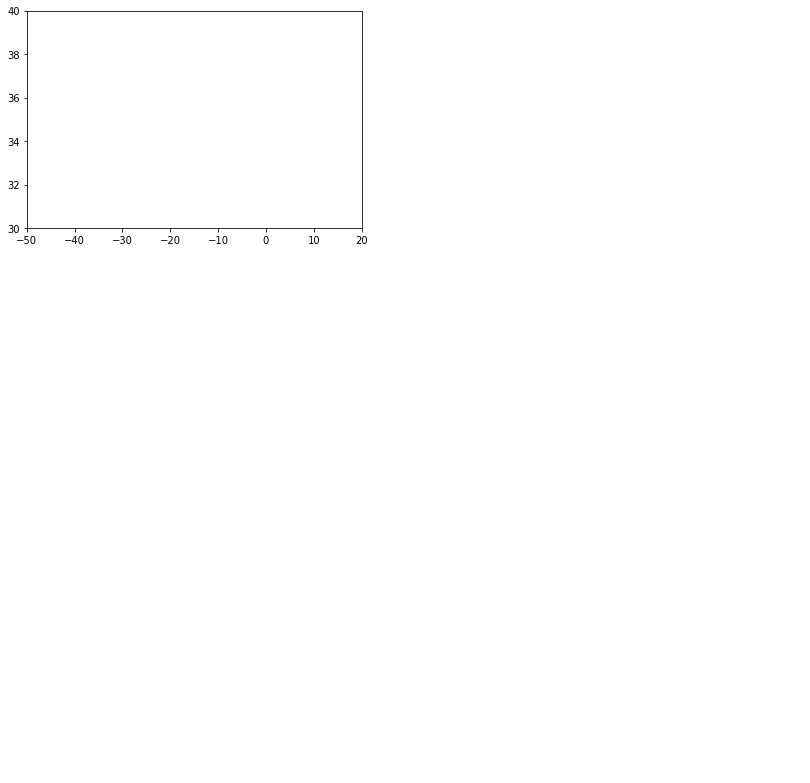

finished plotting for initial cluster  1
len of listclusterids 65
continuedly
array1 [1, 2.0, 2.0]
array2 [1, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 4.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 4.0, 5.0, 6.0, 6.0, 5.0, 7.0, 7.0, 8.0, 6.0, 8.0, 9.0, 7.0, 7.0, 9.0, 9.0, 14.0, 14.0, 9.0, 9.0, 6.0, 6.0, 4.0, 4.0, 6.0, 6.0, 6.0]
curr frame is: 50
curr frame is: 51
f is 1817
curr frame is: 52
f is 2232
curr frame is: 53
f is 3639
curr frame is: 54
f is 76
f is 5150
curr frame is: 55
f is 5796
curr frame is: 56
f is 5396
curr frame is: 57
f is 5167
curr frame is: 58
f is 4769
curr frame is: 59
f is 3624
curr frame is: 60
f is 2810
curr frame is: 61
f is 2823
curr frame is: 62
f is 2996
curr frame is: 63
f is 2820
curr frame is: 64
f is 3297
curr frame is: 65
f is 3289
curr frame is: 66
f is 2409
curr frame is: 67
f is 1497
curr frame is: 68
f is 1102
curr frame is: 69
f is 632
curr frame 

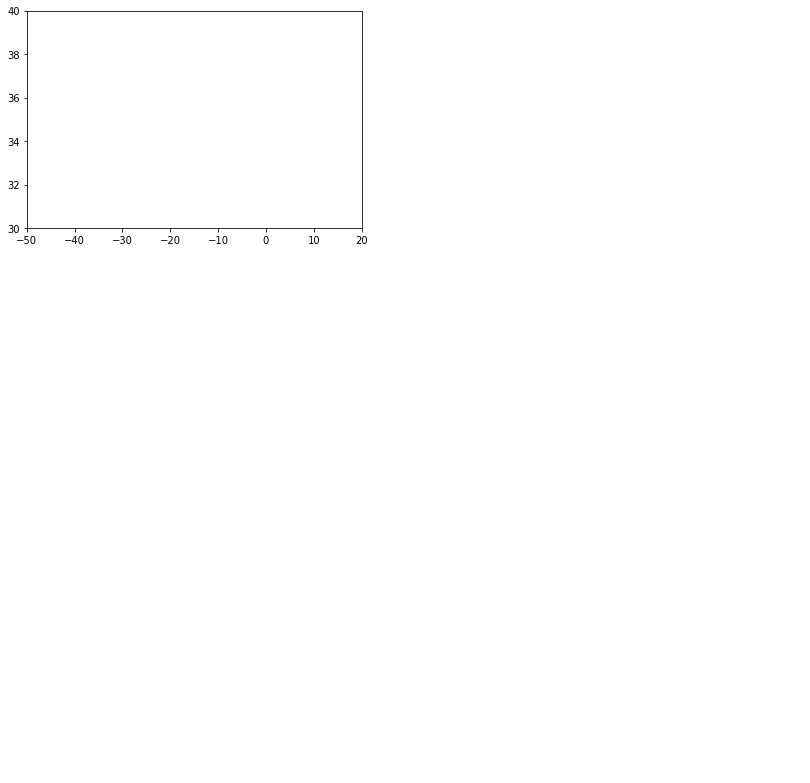

finished plotting for initial cluster  2


KeyboardInterrupt: 

In [10]:
# hybrid 2 complete procedure
# July 29

# August 6: timer
import time

start = time.time()

totalcomparisons = 0

c1 = 1
c2 = 5

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 50
endframe = initialframe+100

imissed=[]
icont = []
iwrong= []

timertimes = []

for initialcluster in range(c1, c2+1):
    
    xarr =[]
    yarr =[]
    
    
    start2 = time.time()
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}

    prevmap = {}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf


    thres= 50

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []
    
    # debugging, 8/31/21
    fvalmap = {}
    
    for i in range(initialframe, endframe+1):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq?
        for j in range(0, mx):
            matchfreq[j] =0

        currentmap3 = {} # average coordinates

        print("curr frame is:", i)

        # reset f? matchfreq?
        
        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        #h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        list1 = trajcount1.get(fromi) # list of maps
                        if list1 !=None:
                            i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                            #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                            currentmap[i1] = 1
                            prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                # save angle

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    
                    fvalmap[i] = matchfreq
                    """
                    if initialcluster==5:
                        print("matchfreq for frame ", i, "is:", matchfreq)"""
                    
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                #h1, i1 = dhighestfreq(fromi)
                # save to map
                list1 = trajcount1.get(fromi) # list of maps
                if list1 !=None:
                    i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                    #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                    currentmap[i1] = 1
                #currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val == None:
                    pass
                else:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1
            numo2 = float(clusterid)
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            xvalues=[] ##RESET
            yvalues=[]
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap

            if len(hxvalues) ==0:
                foundmin=0
                mindist = thres
                c_first=0
                for c in currentmap3:
                    cvalue = currentmap3[c]
                    cx = cvalue[0]
                    cy = cvalue[1]
                    ax = finalx[-1]
                    ay = finaly[-1]
                    dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                    dist = math.sqrt(dist1)
                    if dist < thres:
                        if c_first==0:
                            c_first=1
                            minclust=c
                            mcx = cx
                            mcy= cy
                            mindist = dist
                        foundmin=1
                        if dist< mindist:
                            mindist = dist
                            minclust=c
                            mcx = cx
                            mcy = cy
                
                # check mindist
                print("min dist is ", mindist)
                #print( "previous coordinates are", )
                """if mindist > 10:
                    print("min distance greater than 10 , stop")
                    print( " break?")
                    print("previous coord are:", ax, "and ", ay)
                    break"""
                if foundmin==1:
                    print("found min")
                    print("dist is", mindist)
                    print("minclust is", minclust)
                    if len(angles)==0:
                        print("angles array is of length 0 and minclust:", minclust)
                        prevmap = totalmap[minclust]
                        avx = mcx
                        avy = mcy 
                        ## move to end
                        ## finalarray.append(minclust)                       
                        # add to angles
                        xdiff = avx - finalx[-1]
                        ydiff = avy - finaly[-1]
                        ## check initial direction 2/28/21 
                        if avy >20: # +y, -x
                            # break if both directions are unsatisfied / one direction unsat.
                            if xdiff >0 and ydiff <0:
                                print("both dir. unsat.")
                                # plot
                                plt.scatter(mcx, mcy)
                                plt.annotate("wrong dir?", (mcx, mcy))
                                #break
                        if avy <20: # -y, +x
                            if xdiff<0 and ydiff>0:
                                print("both dir. unsat.")
                                plt.scatter(mcx, mcy)
                                #plot 
                                plt.annotate("wrong dir?", (mcx, mcy))
                                #break
                        rad = math.atan2(ydiff, xdiff)
                        ang = math.degrees(rad)
                        # moved here 
                        finalarray.append(minclust)  
                        
                        if ang<0:
                            ang = 360+ang
                        angles.append(ang)

                        finalx.append(mcx)
                        finaly.append(mcy)



                        #plt.scatter(mcx, mcy)
                        #plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
                        continue
                    prev_avex = finalx[-1]
                    prev_avey = finaly[-1]

                    xdiff_curr = mcx - prev_avex #how is avx set?
                    ydiff_curr = mcy - prev_avey 
                    
                    """if mcy >20: # +y, -x
                        # break if both directions are unsatisfied / one direction unsat.
                        if xdiff_curr >0 and ydiff_curr <0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    if mcy <20:
                        if xdiff_curr<0 and ydiff_curr>0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break"""
                    
                    # calc angle
                    rad = math.atan2(ydiff_curr, xdiff_curr)

                    ang = math.degrees(rad)
                    if ang<0:
                        ang = 360+ang

                    prev_ang = angles[-1]

                    ang_diff = abs(ang - prev_ang)

                    print("prev ang :", prev_ang)
                    print("curr ang:", ang)

                    print("ang_diff is:", ang_diff)
                    
                    # move out of if below
                    prevmap= totalmap[minclust]
                    avx = mcx
                    avy =mcy
                    finalarray.append(minclust)
                    
                    finalx.append(mcx)
                    finaly.append(mcy)
                    
                    if ang_diff <= 30: # change from 45 to 30
                        print("angle holds")
                        prevmap= totalmap[minclust]
                        avx = mcx
                        avy =mcy
                        finalarray.append(minclust)
                        finalx.append(mcx)
                        finaly.append(mcy)
                        # append to slopes / diffs
                        #xdiff.append(avx - avex[-1])
                        #ydiff.append(avy - avey[-1])
                        #avex.append(avx)
                        #avey.append(avy)
                        #append to angles
                        angles.append(ang)
                    else:
                        print("angles too large > 30 , stop")
                        print("angles is ", angles)
                        break
                else:
                    print("not found and end, after last frame", i)
                    break
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                prev_avx = finalx[-1]
                prev_avy = finaly[-1]

                # update angles
                xdiff = avx - prev_avx
                ydiff = avy - prev_avy 
                rad = math.atan2(ydiff, xdiff)
                ang = math.degrees(rad)
                if ang <0:
                    ang = 360+ang
                angles.append(ang)

                finalx.append(avx)
                finaly.append(avy)

            #print("final x", finalx)
            #print("final y", finaly)


    end2 = time.time()
    
    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    listclusterids= finalarray
    
    #print("listclusterids is", listclusterids)
    
    # plot
    
    
    alen = len(finalarray)
    #print("length of array ", alen)
    
    print("adding ", alen, " to total comparisons")
    
    totalcomparisons = totalcomparisons+alen # July 30
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            #plt.scatter(xarray,yarray)
            xarr.extend(xarray)
            yarr.extend(yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.scatter(xarr, yarr, c=xarr, cmap='inferno')
    
    # set axes limits
    plt.xlim([-50, 20])
    plt.ylim([30, 40])
    
    plt.show()
    
    print("finished plotting for initial cluster ", initialcluster)

    
    # app result
    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1
    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    """if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong"""
    #totalcomparisons= totalcomparisons+maxlen
        
    contflag = 0
    missedflag= 0
    
    # print length of array found
    print("len of listclusterids", len(listclusterids))
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continuedly")
            icont.append(initialcluster)
            print("array1", result) # array1 is app result
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missedly")
            imissed.append(initialcluster)
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrongly")
            iwrong.append(initialcluster)
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
        
print("missed matchings:", missedmatching)
print("cont matchings:", continuedmatching)
print("wrong matchings:", wrongmatching)
print("total :", totalcomparisons)
print("clust. errors:", clustering_error)

print("imissed", imissed)
print("iwrong", iwrong)
print("icont", icont)

# july 29
end1 = time.time()
print("time is ", end1 - start)

In [10]:
#fvalmap

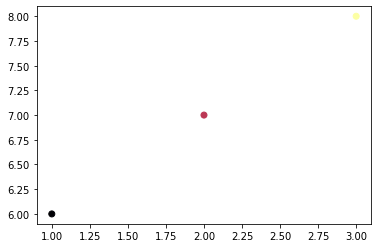

In [37]:
# change color map
#colormap = matplotlib. colors. ListedColormap(colors)
x= [1,2,3]
y=[6,7,8]
plt.scatter(x, y, c=x, cmap='inferno')
plt.show()

In [ ]:
# debug

i is 820
av coord are -9.507094463087247 27.976098154362422
i is 821
av coord are -9.788326904761904 27.945521428571425
i is 822
av coord are -6.378298704103671 27.653372570194385
i is 823
av coord are -7.900697470817121 27.775688715953308


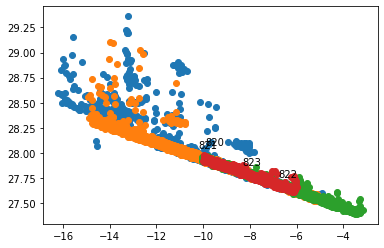

In [89]:

# plot other clusters
array1=  [2, 5, 2, 2]#, 1, 4, 2, 2, 1, 2, 2]

alen = len(array1)
xv1=[]
yv1=[]

ax =[]
ay =[]

acounter=0
for i in range(initialframe, initialframe+alen):
    name = "file_out/file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = array1[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                #xmissed.append(xpoint)
                #ymissed.append(ypoint)
                
                
        # plot
        #xv1.extend(xarray)
        #yv1.extend(yarray)
        
        
        plt.scatter(xarray,yarray)
        avx = np.mean(xarray)
        avy = np.mean(yarray)
        
        print("i is", i)
        print("av coord are", avx, avy)
        
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
        ax.append(avx)
        ay.append(avy)
    
    acounter =acounter +1
    if acounter > alen:
        break

#plt.scatter(xv1, yv1)
#plt.scatter(xv2, yv2)
plt.show()


In [13]:
# highest of 80 percent freq.

def highest80(fromi):
    highest =[0] # now it is array
    indexhighest = [-1] # now it is array
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            hi = np.max(highest)
            if t > 0.8*hi: # instead of checking if it is > highest, check if >= 0.8*highest, prune those less
                highest.append(t)
                indexhighest.append(toi)
    # remove the indices that are too low
    ind=0
    nhighest=[]
    nindexhighest=[]
    m = np.max(highest)
    for val in highest:
        if val >= float(0.8*(m)):
            nhighest.append(val)
            nindexhighest.append(indexhighest[ind])
        ind=ind+1
    return nhighest, nindexhighest
    

In [1]:
# scoring functions 

# https://en.wikipedia.org/wiki/Scoring_rule

import numpy as np
# log: ln r 

# take ln of probability 
def ln_score(r):
    return(np.log(r)) 



# quadratic / Brier
# 2r_i - sum r_j^2 
def quad_score(i, r): # r_i probability assigned to correct answer , C is # classes
    r_hat_i = r[-i]
    ri = r[i] 
    r2 = np.square(r_hat_i)
    qs = 2*ri - np.sum(r2)
    return(qs)
    
# spherical scoring rule
def sphere_score(i, r): # r is the array of all values
    sqsum =0
    ri = r[i]
    for el in r:
        sqsum=sqsum+np.pow(el, 2)
    den = np.sqrt(sqsum)
    return( float(ri/den))
    

In [ ]:
# use the score functions directly

In [ ]:
# combine highest with score function
def highest_with_score_ln(fromi):
    highest =[0] # now it is array
    indexhighest = [-1] # now it is array
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            hi = np.max(highest)
            if t > 0.8*hi: # instead of checking if it is > highest, check if >= 0.8*highest, prune those less
                highest.append(t)
                indexhighest.append(toi)
    # remove the indices that are too low
    ind=0
    nhighest=[]
    nindexhighest=[]
    m = np.max(highest)
    fin_scores=[] # May 9
    for val in highest:
        if val >= float(0.8*(m)):
            qv = ln_score(val)
            nhighest.append(val)
            fin_scores.append(qv)
            nindexhighest.append(indexhighest[ind])
        ind=ind+1
    return fin_scores, nindexhighest

In [ ]:
# combine highest with score function
def highest_with_score_quad(fromi):
    highest =[0] # now it is array
    indexhighest = [-1] # now it is array
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            hi = np.max(highest)
            if t > 0.8*hi: # instead of checking if it is > highest, check if >= 0.8*highest, prune those less
                highest.append(t)
                indexhighest.append(toi)
    # remove the indices that are too low
    ind=0
    nhighest=[]
    nindexhighest=[]
    m = np.max(highest)
    fin_scores=[] # May 9
    for val in highest:
        if val >= float(0.8*(m)):
            qv = quad_score(ind, highest)
            nhighest.append(val)
            fin_scores.append(qv)
            nindexhighest.append(indexhighest[ind])
        ind=ind+1
    return fin_scores, nindexhighest

In [ ]:
# new method: add frequency score to each next cell 

# use nhighest returned

# use only number of unique pts of cell to normalize by

In [4]:
# hybrid score function April 30 complete procedure

# unique clusters
print("unique clusters")

totalcomparisons = 0

c1 = 1
c2 = 12

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 410
endframe = 500

unew = map10[initialframe]

ca = list(range(c1, c2+1))
#unew = [1]
carray = np.setdiff1d(ca, unew)

print("carray :", carray)

for initialcluster in ca:#range(c1, c2+1):
    
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}
    totalmapscore={}

    prevmap = {}
    # may 3 2021
    prevmapscore={}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf
    
    # April 30
    # array for counts of pts in clusters
    counts = {} #[]
    # normalized matchfreq scores
    normalmatchfreq = mf

    thres= 10

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []
    
    for i in range(initialframe, endframe+1):
        
        
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0
            normalmatchfreq[j]=0

        currentmap3 = {} # average coordinates

        print("curr frame is:", i)


        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}
            currentmapscore={} # may 3 2021 

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        hlist, ilist = highest_with_score_ln(fromi) #highest80(fromi)
                        #ilist = np.unique(i1)
                        hind = 0
                        for ind1 in ilist:
                            prevmap[ind1] = 1
                            prevmapscore[ind1] = hlist[hind]
                            
                            hind=hind+1
                        #i1 = newhighestfreq(fromi)
                        #prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                # save angle

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            # counter of number of points in cluster: unique points?
            ccount = 1
            uclusters = []
            
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    totalmapscore[numo1] = currentmapscore # May 3 2021 
                    
                    counts[numo1] = ccount
                    normalmatchfreq[numo1] = matchfreq[numo1]/ccount
                    
                    if normalmatchfreq[numo1] > f:#matchfreq[numo1] > f:
                        f = normalmatchfreq[numo1] #matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    currentmapscore={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]
                    
                    ccount=1
                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                
                # may 6
                # only increment if not already there
                if [xr, yr] not in uclusters:
                    uclusters.append([xr, yr])
                    ccount=ccount+1
                    # moved to within if statement, May 6
                    xvalues.append(xpoint) # save to array 
                    yvalues.append(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    # function to find highest freq 
                    h1, i1 = highest_with_score_ln(fromi) # highest80(fromi)
                    # save to map
                    #currentmap[i1] = 1
                    hind=0
                    for ind1 in i1:
                        currentmap[ind1] = 1
                        currentmapscore[ind1] = h1[hind]
                        hind=hind+1
                    # check prev map
                    val = prevmap.get(fromi)
                    hval = prevmapscore.get(fromi) # May 3 2021
                    if val == None or hval==None:
                        pass
                    else:
                        numo = float(obnum)
                        #print("hval is", hval)
                        #print("hval type is,", type())
                        matchfreq[numo] = matchfreq[numo]+ float(hval) # 1 to hval 
            # check at end of file
            numo2 = float(clusterid)
            counts[numo2] = ccount
            normalmatchfreq[numo2] = matchfreq[numo2]/ccount
            
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            totalmapscore[numo2] = currentmapscore # May 8 , 21
            
            if normalmatchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
                totalmapscore[ky] = currentmapscore # may 8, 21

            if len(hxvalues) ==0:
                foundmin=0
                mindist = thres
                c_first=0
                for c in currentmap3:
                    cvalue = currentmap3[c]
                    cx = cvalue[0]
                    cy = cvalue[1]
                    ax = finalx[-1]
                    ay = finaly[-1]
                    dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                    dist = math.sqrt(dist1)
                    if dist < thres:
                        if c_first==0:
                            c_first=1
                            minclust=c
                            mcx = cx
                            mcy= cy
                            mindist = dist
                        foundmin=1
                        if dist< mindist:
                            mindist = dist
                            minclust=c
                            mcx = cx
                            mcy = cy
                if foundmin==1:
                    print("found min")
                    print("dist is", mindist)
                    print("minclust is", minclust)
                    if len(angles)==0:
                        print("angles array is of length 0 and minclust:", minclust)
                        prevmap = totalmap[minclust]
                        prevmapscore = totalmapscore[minclust]
                        avx = mcx
                        avy = mcy 
                        ## move to end
                        ## finalarray.append(minclust)                       
                        # add to angles
                        xdiff = avx - finalx[-1]
                        ydiff = avy - finaly[-1]
                        ## check initial direction 2/28/21 
                        if avy >20: # +y, -x
                            # break if both directions are unsatisfied / one direction unsat.
                            if xdiff >0 and ydiff <0:
                                print("both dir. unsat.")
                                # plot
                                plt.scatter(mcx, mcy)
                                plt.annotate("wrong dir.", (mcx, mcy))
                                break
                        if avy <20: # -y, +x
                            if xdiff<0 and ydiff>0:
                                print("both dir. unsat.")
                                plt.scatter(mcx, mcy)
                                #plot 
                                plt.annotate("wrong dir.", (mcx, mcy))
                                break
                        rad = math.atan2(ydiff, xdiff)
                        ang = math.degrees(rad)
                        # moved here 
                        finalarray.append(minclust)  
                        
                        if ang<0:
                            ang = 360+ang
                        angles.append(ang)

                        finalx.append(mcx)
                        finaly.append(mcy)



                        #plt.scatter(mcx, mcy)
                        #plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
                        continue
                    prev_avex = finalx[-1]
                    prev_avey = finaly[-1]

                    xdiff_curr = mcx - prev_avex #how is avx set?
                    ydiff_curr = mcy - prev_avey 
                    
                    if mcy >20: # +y, -x
                        # break if both directions are unsatisfied / one direction unsat.
                        if xdiff_curr >0 and ydiff_curr <0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    if mcy <20:
                        if xdiff_curr<0 and ydiff_curr>0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    
                    # calc angle
                    rad = math.atan2(ydiff_curr, xdiff_curr)

                    ang = math.degrees(rad)
                    if ang<0:
                        ang = 360+ang

                    prev_ang = angles[-1]

                    ang_diff = abs(ang - prev_ang)

                    print("prev ang :", prev_ang)
                    print("curr ang:", ang)

                    print("ang_diff is:", ang_diff)
                    if ang_diff <= 30: # change from 45 to 30
                        print("angle holds")
                        prevmap= totalmap[minclust]
                        prevmapscore = totalmapscore[minclust]
                        avx = mcx
                        avy =mcy
                        finalarray.append(minclust)
                        finalx.append(mcx)
                        finaly.append(mcy)
                        # append to slopes / diffs
                        #xdiff.append(avx - avex[-1])
                        #ydiff.append(avy - avey[-1])
                        #avex.append(avx)
                        #avey.append(avy)
                        #append to angles
                        angles.append(ang)
                    else:
                        print("angles too large, stop")
                        break
                else:
                    print("not found and end, after last frame", i)
                    break
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]
                prevmapscore = totalmapscore[ky]  # add to prevmapscore May 3 2021

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                prev_avx = finalx[-1]
                prev_avy = finaly[-1]

                # update angles
                xdiff = avx - prev_avx
                ydiff = avy - prev_avy 
                rad = math.atan2(ydiff, xdiff)
                ang = math.degrees(rad)
                if ang <0:
                    ang = 360+ang
                angles.append(ang)

                finalx.append(avx)
                finaly.append(avy)
            
            if i % 10==0:
                print("(map10) i is", i)
                print("(map10) key is", ky)
                m10 = map10[i]
                m10.append(ky)
                # check sim clusts
                v1 = errorclusters.get(i)
                if v1!=None:
                    errorarray= errorclusters[i]
                    for el in errorarray:
                        for e in el:
                            if e == ky:
                                m10.extend(el)
                map10[i] = m10

            #print("final x", finalx)
            #print("final y", finaly)


    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    listclusterids= finalarray
    
    print("listclusterids is", listclusterids)
    
    # plot
    
    
    alen = len(finalarray)
    print("length of array ", alen)
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            plt.scatter(xarray,yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.show()
    
    # app result
    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1
    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    # print length of array found
    print("len of listclusterids", len(listclusterids))
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continuedly")
            print("array1", result) # array1 is app result
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missedly")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrongly")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
        
print("missed matchings:", missedmatching)
print("cont matchings:", continuedmatching)
print("wrong matchings:", wrongmatching)
print("total :", totalcomparisons)
print("clust. errors:", clustering_error)


unique clusters
carray : [ 1  2  3  4  5  6  7  8  9 10 11 12]


NameError: name 'defaultdict' is not defined

In [19]:
fromi

55832

In [20]:
prevmap[fromi]

1

In [21]:
prevmapscore[fromi]

KeyError: 55832

In [22]:
prevmap

{55832: 1,
 56232: 1,
 55831: 1,
 56632: 1,
 56631: 1,
 57032: 1,
 57031: 1,
 57431: 1,
 57831: 1,
 58231: 1,
 58631: 1,
 58632: 1,
 58633: 1,
 58634: 1,
 59034: 1,
 59032: 1,
 59031: 1}

In [23]:
prevmapscore

{57014: 6,
 57413: 7,
 57414: 7,
 57415: 3,
 57813: 15,
 57814: 1,
 56615: 1,
 57015: 1,
 57412: 1,
 57815: 1,
 58216: 1}

In [ ]:
# code to plot the frequencies 


curr frame is: 40
curr frame is: 41
min dist is  15.434071981608195
min distance greater than 10 , stop
 break?
previous coord are: 3.0106712121212125 and  15.455636363636364
found min
dist is 15.434071981608195
minclust is 3.0
angles array is of length 0 and minclust: 3.0
curr frame is: 42
f is 71
curr frame is: 43
f is 53
curr frame is: 44
min dist is  9.232930816308073
found min
dist is 9.232930816308073
minclust is 3.0
prev ang : 173.217146442214
curr ang: 36.44300113584459
ang_diff is: 136.7741453063694
angles too large > 30 , stop
angles is  [45.07329283144721, 176.9888471630085, 173.217146442214]
initial cluster 1
initial frame 40
final array is [1, 3.0, 1.0, 2.0, 3.0]
adding  5  to total comparisons


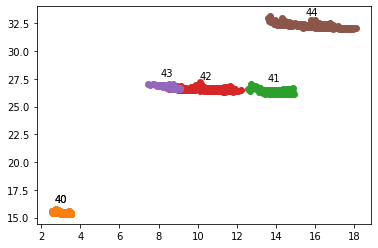

finished plotting for initial cluster  1
len of listclusterids 5
continuedly
array1 [1]
array2 [1, 3.0, 1.0, 2.0, 3.0]
curr frame is: 40
curr frame is: 41
f is 96
curr frame is: 42
f is 87
curr frame is: 43
f is 74
curr frame is: 44
f is 119
curr frame is: 45
f is 131
curr frame is: 46
f is 70
curr frame is: 47
f is 43
curr frame is: 48
f is 46
curr frame is: 49
f is 22
curr frame is: 50
min dist is  21.92739737980036
min distance greater than 10 , stop
 break?
previous coord are: -21.051454545454543 and  35.057681818181806
found min
dist is 21.92739737980036
minclust is 4.0
both dir. unsat.; angles not empty
initial cluster 2
initial frame 40
final array is [2, 1.0, 7.0, 9.0, 8.0, 9.0, 7.0, 8.0, 7.0, 7.0]
adding  10  to total comparisons


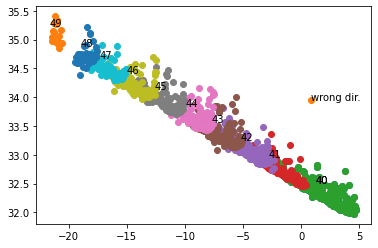

finished plotting for initial cluster  2
len of listclusterids 10
wrongly
array1 [2, 2.0, 7.0, 9.0, 0, 0, 0, 0, 0, 0, 0]
array2 [2, 1.0, 7.0, 9.0, 8.0, 9.0, 7.0, 8.0, 7.0, 7.0]
curr frame is: 40
curr frame is: 41
f is 27
curr frame is: 42
f is 71
curr frame is: 43
f is 53
curr frame is: 44
min dist is  9.232930816308073
found min
dist is 9.232930816308073
minclust is 3.0
prev ang : 173.217146442214
curr ang: 36.44300113584459
ang_diff is: 136.7741453063694
angles too large > 30 , stop
angles is  [173.9402828997044, 176.9888471630085, 173.217146442214]
initial cluster 3
initial frame 40
final array is [3, 3.0, 1.0, 2.0, 3.0]
adding  5  to total comparisons


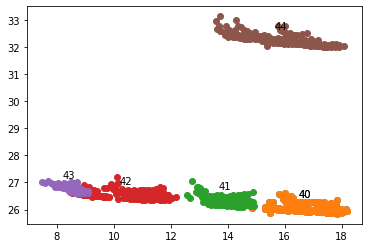

finished plotting for initial cluster  3
len of listclusterids 5
curr frame is: 40
curr frame is: 41
f is 83
curr frame is: 42
min dist is  13.41881141497591
min distance greater than 10 , stop
 break?
previous coord are: 22.90723711340206 and  31.4980618556701
found min
dist is 13.41881141497591
minclust is 1.0
prev ang : 174.69569379110527
curr ang: 201.56300643323155
ang_diff is: 26.86731264212628
angle holds
curr frame is: 43
f is 53
curr frame is: 44
min dist is  9.232930816308073
found min
dist is 9.232930816308073
minclust is 3.0
prev ang : 173.217146442214
curr ang: 36.44300113584459
ang_diff is: 136.7741453063694
angles too large > 30 , stop
angles is  [174.69569379110527, 201.56300643323155, 173.217146442214]
initial cluster 4
initial frame 40
final array is [4, 4.0, 1.0, 1.0, 2.0, 3.0]
adding  6  to total comparisons


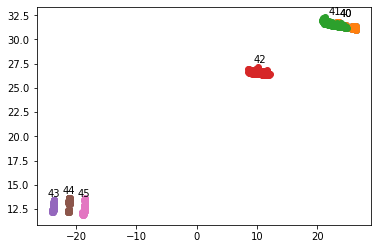

finished plotting for initial cluster  4
len of listclusterids 6
continuedly
array1 [4, 4.0]
array2 [4, 4.0, 1.0, 1.0, 2.0, 3.0]
curr frame is: 40
curr frame is: 41
min dist is  27.597230968271898
min distance greater than 10 , stop
 break?
previous coord are: 33.095636363636366 and  5.850378181818181
found min
dist is 27.597230968271898
minclust is 4.0
angles array is of length 0 and minclust: 4.0
curr frame is: 42
min dist is  13.41881141497591
min distance greater than 10 , stop
 break?
previous coord are: 22.90723711340206 and  31.4980618556701
found min
dist is 13.41881141497591
minclust is 1.0
prev ang : 111.66517421580987
curr ang: 201.56300643323155
ang_diff is: 89.89783221742168
angles too large > 30 , stop
angles is  [111.66517421580987]
initial cluster 5
initial frame 40
final array is [5, 4.0, 1.0]
adding  3  to total comparisons


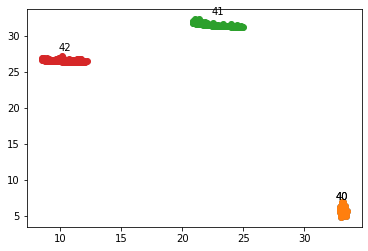

finished plotting for initial cluster  5
len of listclusterids 3
continuedly
array1 [5]
array2 [5, 4.0, 1.0]
curr frame is: 40
curr frame is: 41
f is 62
curr frame is: 42
f is 100
curr frame is: 43
f is 178
curr frame is: 44
f is 277
curr frame is: 45
f is 41
f is 191
curr frame is: 46
f is 99
f is 201
curr frame is: 47
f is 222
curr frame is: 48
f is 263
curr frame is: 49
f is 162
curr frame is: 50
f is 61
initial cluster 6
initial frame 40
final array is [6, 5.0, 4.0, 6.0, 1.0, 7.0, 6.0, 7.0, 5.0, 6.0, 6.0]
adding  11  to total comparisons


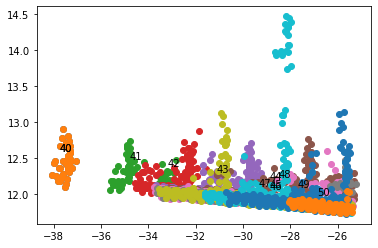

finished plotting for initial cluster  6
len of listclusterids 11
curr frame is: 40
curr frame is: 41
f is 247
curr frame is: 42
f is 361
curr frame is: 43
f is 66
f is 163
curr frame is: 44
min dist is  1.9647894968638384
found min
dist is 1.9647894968638384
minclust is 1.0
prev ang : 347.3450570936663
curr ang: 188.39757407705602
ang_diff is: 158.94748301661028
angles too large > 30 , stop
angles is  [351.3779421918797, 356.25004717944114, 347.3450570936663]
initial cluster 7
initial frame 40
final array is [7, 6.0, 5.0, 7.0, 1.0]
adding  5  to total comparisons


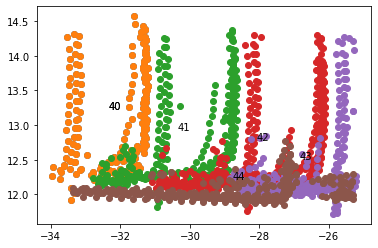

finished plotting for initial cluster  7
len of listclusterids 5
wrongly
array1 [7, 6.0, 5.0, 1.0]
array2 [7, 6.0, 5.0, 7.0, 1.0]
missed matchings: 0
cont matchings: 3
wrong matchings: 2
total : 45
clust. errors: 3
imissed []
iwrong [2, 7]
icont [1, 4, 5]
time is  48.53275275230408


In [12]:
# Sept 3 fix bug when i = initialframe

# August 6: timer
import time

start = time.time()

totalcomparisons = 0

c1 = 1
c2 = 7

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 40
endframe = initialframe+10

imissed=[]
icont = []
iwrong= []

timertimes = []
for initialcluster in range(c1, c2+1):
    
    
    start2 = time.time()
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}

    prevmap = {}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf


    thres= 50

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []
    
    for i in range(initialframe, endframe+1):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0

        currentmap3 = {} # average coordinates

        print("curr frame is:", i)


        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        #h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        list1 = trajcount1.get(fromi) # list of maps
                        if list1 !=None:
                            i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                            #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                            currentmap[i1] = 1
                            prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                # save angle

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                #h1, i1 = dhighestfreq(fromi)
                # save to map
                list1 = trajcount1.get(fromi) # list of maps
                if list1 !=None:
                    i1 = highestfreq1(fromi) #h1, i1 = dhighestfreq(fromi)
                    #h1, i1 = highest80_quad_norm(fromi)  # highest80_quad_norm or highest80_quad
                    currentmap[i1] = 1
                #currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val == None:
                    pass
                else:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1
            numo2 = float(clusterid)
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            xvalues=[] ##RESET
            yvalues=[]
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap

            if len(hxvalues) ==0:
                foundmin=0
                mindist = thres
                c_first=0
                for c in currentmap3:
                    cvalue = currentmap3[c]
                    cx = cvalue[0]
                    cy = cvalue[1]
                    ax = finalx[-1]
                    ay = finaly[-1]
                    dist1 = pow(cx - ax,2) + pow(cy - ay,2)
                    dist = math.sqrt(dist1)
                    if dist < thres:
                        if c_first==0:
                            c_first=1
                            minclust=c
                            mcx = cx
                            mcy= cy
                            mindist = dist
                        foundmin=1
                        if dist< mindist:
                            mindist = dist
                            minclust=c
                            mcx = cx
                            mcy = cy
                
                # check mindist
                print("min dist is ", mindist)
                #print( "previous coordinates are", )
                if mindist > 10:
                    print("min distance greater than 10 , stop")
                    print( " break?")
                    print("previous coord are:", ax, "and ", ay)
                    #break
                if foundmin==1:
                    print("found min")
                    print("dist is", mindist)
                    print("minclust is", minclust)
                    if len(angles)==0:
                        print("angles array is of length 0 and minclust:", minclust)
                        prevmap = totalmap[minclust]
                        avx = mcx
                        avy = mcy 
                        ## move to end
                        ## finalarray.append(minclust)                       
                        # add to angles
                        xdiff = avx - finalx[-1]
                        ydiff = avy - finaly[-1]
                        ## check initial direction 2/28/21 
                        if avy >20: # +y, -x
                            # break if both directions are unsatisfied / one direction unsat.
                            if xdiff >0 and ydiff <0:
                                print("both dir. unsat.")
                                # plot
                                plt.scatter(mcx, mcy)
                                plt.annotate("wrong dir.", (mcx, mcy))
                                break
                        if avy <20: # -y, +x
                            if xdiff<0 and ydiff>0:
                                print("both dir. unsat.")
                                plt.scatter(mcx, mcy)
                                #plot 
                                plt.annotate("wrong dir.", (mcx, mcy))
                                break
                        rad = math.atan2(ydiff, xdiff)
                        ang = math.degrees(rad)
                        # moved here 
                        finalarray.append(minclust)  
                        
                        if ang<0:
                            ang = 360+ang
                        angles.append(ang)

                        finalx.append(mcx)
                        finaly.append(mcy)



                        #plt.scatter(mcx, mcy)
                        #plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
                        continue
                    prev_avex = finalx[-1]
                    prev_avey = finaly[-1]

                    xdiff_curr = mcx - prev_avex #how is avx set?
                    ydiff_curr = mcy - prev_avey 
                    
                    if mcy >20: # +y, -x
                        # break if both directions are unsatisfied / one direction unsat.
                        if xdiff_curr >0 and ydiff_curr <0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    if mcy <20:
                        if xdiff_curr<0 and ydiff_curr>0:
                            print("both dir. unsat.; angles not empty")
                            # plot
                            plt.scatter(mcx, mcy)
                            plt.annotate("wrong dir.", (mcx, mcy))
                            break
                    
                    # calc angle
                    rad = math.atan2(ydiff_curr, xdiff_curr)

                    ang = math.degrees(rad)
                    if ang<0:
                        ang = 360+ang

                    prev_ang = angles[-1]

                    ang_diff = abs(ang - prev_ang)

                    print("prev ang :", prev_ang)
                    print("curr ang:", ang)

                    print("ang_diff is:", ang_diff)
                    
                    # move out of if below
                    prevmap= totalmap[minclust]
                    avx = mcx
                    avy =mcy
                    finalarray.append(minclust)
                    
                    finalx.append(mcx)
                    finaly.append(mcy)
                    
                    if ang_diff <= 30: # change from 45 to 30
                        print("angle holds")
                        prevmap= totalmap[minclust]
                        avx = mcx
                        avy =mcy
                        finalarray.append(minclust)
                        finalx.append(mcx)
                        finaly.append(mcy)
                        # append to slopes / diffs
                        #xdiff.append(avx - avex[-1])
                        #ydiff.append(avy - avey[-1])
                        #avex.append(avx)
                        #avey.append(avy)
                        #append to angles
                        angles.append(ang)
                    else:
                        print("angles too large > 30 , stop")
                        print("angles is ", angles)
                        break
                else:
                    print("not found and end, after last frame", i)
                    break
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                prev_avx = finalx[-1]
                prev_avy = finaly[-1]

                # update angles
                xdiff = avx - prev_avx
                ydiff = avy - prev_avy 
                rad = math.atan2(ydiff, xdiff)
                ang = math.degrees(rad)
                if ang <0:
                    ang = 360+ang
                angles.append(ang)

                finalx.append(avx)
                finaly.append(avy)

            #print("final x", finalx)
            #print("final y", finaly)


    end2 = time.time()
    
    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    listclusterids= finalarray
    
    #print("listclusterids is", listclusterids)
    
    # plot
    
    
    alen = len(finalarray)
    #print("length of array ", alen)
    
    print("adding ", alen, " to total comparisons")
    
    totalcomparisons = totalcomparisons+alen # July 30
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out/file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            plt.scatter(xarray,yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.show()
    
    print("finished plotting for initial cluster ", initialcluster)

    
    # app result
    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1
    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    """if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong"""
    #totalcomparisons= totalcomparisons+maxlen
        
    contflag = 0
    missedflag= 0
    
    # print length of array found
    print("len of listclusterids", len(listclusterids))
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continuedly")
            icont.append(initialcluster)
            print("array1", result) # array1 is app result
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missedly")
            imissed.append(initialcluster)
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrongly")
            iwrong.append(initialcluster)
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
        
print("missed matchings:", missedmatching)
print("cont matchings:", continuedmatching)
print("wrong matchings:", wrongmatching)
print("total :", totalcomparisons)
print("clust. errors:", clustering_error)

print("imissed", imissed)
print("iwrong", iwrong)
print("icont", icont)

# july 29
end1 = time.time()
print("time is ", end1 - start)